# Ortogonalni polinomi

Neka je 

$$
L(x_0,x_1,\ldots,x_n)
$$

potprostor razapet linearno nezavisnim vektorima (ili funkcijama) $x_0,x_1,\ldots,x_n$.

> Radio se o skupu svih linearnih kombinacija zadanih vektora. 

Koristeći __Gram-Schmidto-ov postupak ortogonalizacije__ možemo izračunati __ortogonalnu__ bazu istog potprostora 

$$
y_0,y_1,\ldots,y_n, 
$$

za koju vrijedi

$$
(y_i,y_j)=0,\quad i\neq j. \tag{1}
$$

Neka je 

\begin{align}
y_0&=x_0\\
y_1&=x_1-\frac{(x_1,y_0)}{(y_0,y_0)}y_0\\
y_2&=x_2-\frac{(x_2,y_0)}{(y_0,y_0)}y_0-\frac{(x_2,y_1)}{(y_1,y_1)}y_1\\
& \vdots \\
y_n&=x_n-\sum_{j=0}^{n-1} \frac{(x_n,y_j)}{(y_j,y_j)}y_j.
\end{align}

Svaki $y_j$ je linearna kombinacija od $x_0,x_1,\ldots,x_j$ pa su $y_j$ linearno nezavisni i vrijedi

$$
L(x_0,x_1,\ldots,x_n)=L(y_0,y_1,\ldots,y_n).
$$

Direktnom provjerom se vidi da vrijedi (1).

__Težinski skalarni produkt__  _funkcija $f$ i $g$ na intervalu $[a,b]$ težinom_ $\omega(x)>0$ je

$$
(f,g)_\omega=\int_a^b f(x)g(x)\omega(x)\, dx
$$

> Funkcije $f$ i $g$ su __ortogonalne__ ako je $(f,g)_\omega=0$.

__Ortogonalni polinomi__ nastaju ortogonalizacijom polinoma

$$
1,x,x^2,x^2,\ldots,x^n. \tag{2}
$$

## Legendreovi polinomi

Ortogonalizirajmo sustav (2) za

$$
[a,b]=[-1,1], \quad \omega(x)=1.
$$

In [1]:
using SymPy

In [2]:
a=-1
b=1
n=symbols("n",integer=true)
# j=symbols("j",integer=true)
# k=symbols("k",integer=true)
n=8
P=Array(Any,n)
x=Sym("x")
P[1]=x^0
ω(x)=1
for k=2:n
    P[k]=x^(k-1)
    for j=1:k-1
        P[k]=P[k]-integrate(x->x^(k-1)*P[j]*ω(x),a,b)*P[j]/integrate(x->P[j]*P[j]*ω(x),a,b)
    end
end

Kako `Julia` indeksiranje započima s 1, svi indeksi su pomaknuti, odnosno

$$
P_0(x)=P[1], \ P_1(x)=P[2], \ldots
$$

In [3]:
P[1]

1

In [4]:
P[4]

 3   3⋅x
x  - ───
      5 

In [5]:
P[6]

         3      
 5   10⋅x    5⋅x
x  - ───── + ───
       9      21

In [6]:
P[7]

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

In [7]:
P[8]

         5        3       
 7   21⋅x    105⋅x    35⋅x
x  - ───── + ────── - ────
       13     143     429 

Polinomi $P_n$ su do na konstantu jednaki __Legendre-ovim__ polinomima

$$
L_n(x)=\frac{1}{2^n n!}\frac{d^n}{dx^n}(x^2-1)^n, \quad n=0,1,2,3,\ldots
$$

In [8]:
n=8
L=Array(Any,n)
L[1]=x^0
for k=1:n-1
    L[k+1]=expand(diff((x^2-1)^k/(2^k*factorial(k)),x,k))
end

In [9]:
L[1], P[1]

(1,1)

In [10]:
L[2],P[2]

(x,x)

In [11]:
L[4],P[4]

(5*x^3/2 - 3*x/2,x^3 - 3*x/5)

In [12]:
L[7],P[7]

(231*x^6/16 - 315*x^4/16 + 105*x^2/16 - 5/16,x^6 - 15*x^4/11 + 5*x^2/11 - 5/231)

In [13]:
P[7]

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

In [14]:
L[7]*16/231

         4      2      
 6   15⋅x    5⋅x     5 
x  - ───── + ──── - ───
       11     11    231

Pored ortogonalnosti, vrijede sljedeća svojstva:

* $L_n(x)$  ima $n$ različitih nul-točaka na intervalu $[-1,1]$, 
* vrijedi _tročlana rekurzivna formula_: 

$$ 
L_{n+1}(x)=\frac{2n+1}{n+1}x L_n(x)-\frac{n}{n+1} L_{n-1}(x).
$$

Izračunajmo polinome numerički i nacrtajmo ih:

In [16]:
using Polynomials
using Interact
using Winston

In [17]:
n=40
L=Array(Any,n)
L[1]=Polynomials.Poly([1])
L[2]=Polynomials.Poly([0,1])
for i=3:n
    p=(2*i-3)*L[2]*L[i-1]/(i-1)-(i-2)*L[i-2]/(i-1)
    L[i]=Polynomials.Poly(map(Float64,[p[j] for j=0:length(p)-2]))
    # @show i, length(L[i])
end

Interact.Slider{Int64}([Reactive.Input{Int64}] 20,"k",20,1:40)

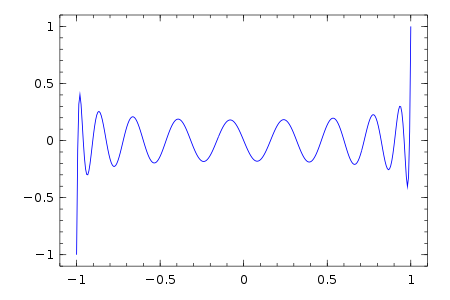

In [18]:
xx=linspace(-1,1,300)
@manipulate for k=1:n
    yy=polyval(L[k],xx)
    Winston.plot(xx,yy,"b")
end

## Čebiševljevi polinomi

__Čebiševljevi polinomi__ $T_n(x)$ nastaju ortogonalizacijom sustava (2) za

$$
[a,b]=[-1,1], \quad \omega(x)=\frac{1}{\sqrt{1-x^2}}.
$$

Čebiševljevi polinomi imaju sljedeća svojstva:

* vrijedi 

$$
T_n(x)=\cos(n\arccos x),\quad n=0,1,2,3,\ldots,
$$

* $T_n(x)$  ima $n$ različitih nul-točaka na intervalu $[-1,1]$, 

$$ 
x_k=\cos \bigg(\frac{2k-1}{n}\frac{\pi}{2} \bigg), \quad k=1,\ldots,n,
$$

* vrijedi _tročlana rekurzivna formula_: 

$$
T_0(x)=1,\\
T_1(x)=x, \\ 
T_{n+1}(x)=2xT_n(x)-T_{n-1}(x),\quad n=1,2,3,\ldots.
$$
 
__Napomena__:

Rekurzivna formula slijedi iz _adicione formule_

$$
\cos(n+1)\varphi+\cos(n-1)\varphi=2\cos\varphi\cos n\varphi.
$$

Ortogonalnost se dokazuje pomoću supstitucije 

$$
\arccos x=\varphi.
$$

In [19]:
# Simbolički
n=8
T=Array(Any,n)
T[1]=x^0
T[2]=x
for k=2:n-1
    T[k+1]=expand(2*x*T[k]-T[k-1])
end

In [20]:
T[3]

   2    
2⋅x  - 1

In [21]:
T[7]

    6       4       2    
32⋅x  - 48⋅x  + 18⋅x  - 1

In [22]:
T[8]

    7        5       3      
64⋅x  - 112⋅x  + 56⋅x  - 7⋅x

In [23]:
# Numerički
n=50
T=Array(Any,n)
T[1]=Polynomials.Poly([1])
T[2]=Polynomials.Poly([0,1])
for i=3:n
    p=2*T[2]*T[i-1]-T[i-2]
    T[i]=Polynomials.Poly(map(BigInt,[p[i] for i=0:length(p)-2]))
    # @show i, length(T[i])
end

Interact.Slider{Int64}([Reactive.Input{Int64}] 25,"k",25,1:50)

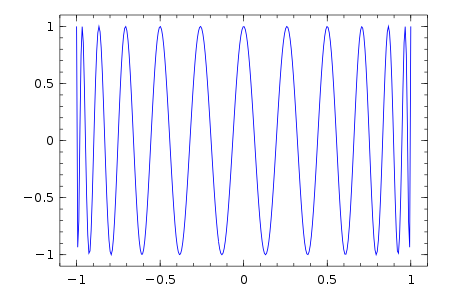

In [24]:
xx=linspace(-1,1,300)
@manipulate for k=1:n
    yy=polyval(T[k],xx)
    Winston.plot(xx,yy,"b")
end